In [39]:
pip install scipy xlrd

Note: you may need to restart the kernel to use updated packages.


In [83]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sst
import math

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [41]:
Ch16data = pd.read_excel('/Users/jennifer/Desktop/Baruch F21/ECO 9723 Econometrics/Data/us_macro_quarterly.xlsx')
Ch16data

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL
0,1955-01-01,2683.766,NaN,NaN,15.755,26.793333
1,1955-04-01,2727.452,6.458723,NaN,15.771,26.756667
2,1955-07-01,2764.128,5.342950,NaN,15.834,26.776667
3,1955-10-01,2780.762,2.399911,NaN,15.878,26.856667
4,1956-01-01,2770.032,-1.546447,NaN,15.943,26.860000
...,...,...,...,...,...,...
247,2016-10-01,16851.420,1.743040,99.125073,111.583,242.177333
248,2017-01-01,16903.240,1.228157,99.291726,112.198,243.949000
249,2017-04-01,17031.085,3.013954,101.324890,112.273,244.010000
250,2017-07-01,17163.894,3.107115,101.724856,112.699,245.296667


In [42]:
Ch16data['l1_PCECTPI'] = Ch16data['PCECTPI'].shift(1)
Ch16data['l1_CPIAUCSL'] = Ch16data['CPIAUCSL'].shift(1)

Ch16data['Pi_PCEP']=400*(np.log(Ch16data['PCECTPI'])-np.log(Ch16data['l1_PCECTPI']))
Ch16data['Pi_CPI']=400*(np.log(Ch16data['CPIAUCSL'])-np.log(Ch16data['l1_CPIAUCSL']))

Ch16data['Y']=Ch16data['Pi_CPI']-Ch16data['Pi_PCEP']
Ch16data

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,l1_CPIAUCSL,Pi_PCEP,Pi_CPI,Y
0,1955-01-01,2683.766,NaN,NaN,15.755,26.793333,NaN,NaN,NaN,NaN,NaN
1,1955-04-01,2727.452,6.458723,NaN,15.771,26.756667,15.755,26.793333,0.406014,-0.547775,-0.953789
2,1955-07-01,2764.128,5.342950,NaN,15.834,26.776667,15.771,26.756667,1.594686,0.298879,-1.295807
3,1955-10-01,2780.762,2.399911,NaN,15.878,26.856667,15.834,26.776667,1.109991,1.193289,0.083298
4,1956-01-01,2770.032,-1.546447,NaN,15.943,26.860000,15.878,26.856667,1.634143,0.049643,-1.584500
...,...,...,...,...,...,...,...,...,...,...,...
247,2016-10-01,16851.420,1.743040,99.125073,111.583,242.177333,111.034,240.548000,1.972899,2.700235,0.727335
248,2017-01-01,16903.240,1.228157,99.291726,112.198,243.949000,111.583,242.177333,2.198584,2.915579,0.716995
249,2017-04-01,17031.085,3.013954,101.324890,112.273,244.010000,112.198,243.949000,0.267295,0.100008,-0.167287
250,2017-07-01,17163.894,3.107115,101.724856,112.699,245.296667,112.273,244.010000,1.514857,2.103662,0.588805


In [43]:
#a

Ch16data[(Ch16data.freq == '1963-01-01')]

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,l1_CPIAUCSL,Pi_PCEP,Pi_CPI,Y
32,1963-01-01,3456.08,4.426382,17.238516,18.069,30.476667,18.018,30.38,1.130602,1.270747,0.140145


In [44]:
Ch16data[(Ch16data.freq == '2017-10-01')]

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,l1_CPIAUCSL,Pi_PCEP,Pi_CPI,Y
251,2017-10-01,17271.702,2.504579,103.491376,113.458,247.301333,112.699,245.296667,2.684871,3.255681,0.570811


In [45]:
mean_Pi_PCEP=st.mean(Ch16data['Pi_PCEP'][32:252])
mean_Pi_CPI=st.mean(Ch16data['Pi_CPI'][32:252])

print('Mean of Pi_PCEP is {:.2f}'.format(mean_Pi_PCEP))
print('Mean of Pi_CPI is {:.2f}'.format(mean_Pi_CPI))

Mean of Pi_PCEP is 3.35
Mean of Pi_CPI is 3.81


In [46]:
#b

mean_Y = st.mean(Ch16data['Y'][32:252])

print('Mean Y is {:.2f}'.format(mean_Y))

print('The mean of Y is the difference in the means {:.2f}'.format(mean_Pi_CPI-mean_Pi_PCEP))

Mean Y is 0.47
The mean of Y is the difference in the means 0.47


In [47]:
#c

print('Y = p_CPI - p_PCED, so E(Y) = E(p_CPI ) - E(p_PCED).')

Y = p_CPI - p_PCED, so E(Y) = E(p_CPI ) - E(p_PCED).


In [48]:
#d

print('Yt = b0 + ut, so E(Yt) = b0 + E(ut) = b0 because E(ut) = 0.')
print('ut represents the deviation of Yt from its mean. Because the factors that lead pi^PCED to differ from pi^CPI are serially correlated, Y (and therefore u) is serially correlated')

Yt = b0 + ut, so E(Yt) = b0 + E(ut) = b0 because E(ut) = 0.
ut represents the deviation of Yt from its mean. Because the factors that lead pi^PCED to differ from pi^CPI are serially correlated, Y (and therefore u) is serially correlated


In [49]:
#e
m = 0.75*220**(1/3)
print('m = {:.0f}'.format(m))

m = 5


In [50]:
lm = smf.ols(formula = 'Y~1', data = Ch16data[32:252])

results = lm.fit(cov_type='HAC', cov_kwds={'maxlags': 5}, use_t=True)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 09 Nov 2021   Prob (F-statistic):                nan
Time:                        19:19:15   Log-Likelihood:                -299.03
No. Observations:                 220   AIC:                             600.1
Df Residuals:                     219   BIC:                             603.5
Df Model:                           0                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4668      0.086      5.402      0.000       0.297       0.637
==============================================================================
Omnibus:                       30.869   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.843
Skew:                          -0.108   Prob(JB):                     1.48e-44
Kurtosis:                       7.688   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 5 lags and without small sample correction
"""

In [51]:
#f

N=len(Ch16data['Y'][32:252])
N
m =0.75*N**0.33
math.ceil(m)

5

In [52]:
#g

year_qrt_full=np.linspace(1955,2017.75,252)
tau=np.linspace(1967,2013.75,188)
for i in range(0, len(tau)):
    dummy1 =pd.DataFrame({"D" + str(i) : np.where(year_qrt_full<tau[i],0,1)})
    dummy1["D" + str(i)] = dummy1["D" + str(i)].astype('float64')
    Ch16data = pd.concat([Ch16data,dummy1["D" + str(i)]], axis = 1)
    Ch16data_new=Ch16data[32:251]

Ch16data_new

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,l1_CPIAUCSL,Pi_PCEP,Pi_CPI,...,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187
32,1963-01-01,3456.080,4.426382,17.238516,18.069,30.476667,18.018,30.380000,1.130602,1.270747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,1963-04-01,3501.134,5.180767,18.222013,18.095,30.533333,18.069,30.476667,0.575158,0.743048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,1963-07-01,3569.479,7.733092,19.178191,18.181,30.720000,18.095,30.533333,1.896574,2.437970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,1963-10-01,3594.954,2.844620,20.161688,18.249,30.803333,18.181,30.720000,1.493277,1.083600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,1964-01-01,3672.708,8.559228,20.817353,18.336,30.930000,18.249,30.803333,1.902423,1.641471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2016-07-01,16778.148,2.742267,97.425215,111.034,240.548000,110.555,239.452000,1.729330,1.826670,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
247,2016-10-01,16851.420,1.743040,99.125073,111.583,242.177333,111.034,240.548000,1.972899,2.700235,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
248,2017-01-01,16903.240,1.228157,99.291726,112.198,243.949000,111.583,242.177333,2.198584,2.915579,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
249,2017-04-01,17031.085,3.013954,101.324890,112.273,244.010000,112.198,243.949000,0.267295,0.100008,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
F_stat=np.zeros(len(tau))
for i in range(0, len(tau)):
    x1=Ch16data_new["D" + str(i)]
    y=Ch16data_new["Y"]
    DATA=pd.concat([x1,y], axis = 1)
    DATA=pd.DataFrame(DATA)
    OLS=smf.ols(formula='y~x1',data=DATA)
    results_OLS = OLS.fit(cov_type='HC1')
    results_OLS.summary()
    hypotheses ='(x1 = 0)'
    F=results_OLS.f_test(hypotheses)
    dir(F)
    F_stat[i]=F.fvalue
    #F.pvalue
    #F_final=F[0]
    #print(F_final)

In [54]:
print(F_stat)

[7.47928395e+00 8.98122870e+00 8.19942970e+00 8.27998532e+00
 6.00340715e+00 7.34913060e+00 8.57907294e+00 5.55226672e+00
 5.26312220e+00 4.06242202e+00 2.70752970e+00 2.52770688e+00
 1.28894344e+00 4.32031978e-01 1.86551684e-01 2.43645706e-01
 2.00554527e-01 4.75306457e-01 1.05334896e+00 1.28575365e+00
 1.27776622e+00 2.10115809e+00 2.23133593e+00 2.79224482e+00
 2.40603497e+00 1.60763652e+00 1.47799987e+00 1.37943699e+00
 6.41066944e-01 8.06646154e-01 1.24977132e+00 1.25256372e+00
 5.40857043e-01 3.87605731e-01 5.46663164e-01 5.24159430e-01
 4.64849140e-01 5.50038950e-01 6.14123383e-01 6.58571367e-01
 9.87054258e-01 1.09347405e+00 1.22560846e+00 1.64885184e+00
 1.79151903e+00 1.90020071e+00 1.68699101e+00 8.59919207e-01
 4.69091121e-01 8.78532844e-02 4.12468042e-03 1.22876114e-01
 5.52107612e-01 1.46848812e+00 2.68939835e+00 1.61636592e+00
 1.94160205e+00 2.03329278e+00 2.53711114e+00 4.35487425e+00
 4.33337143e+00 3.20481628e+00 3.96154480e+00 4.07419163e+00
 2.11837145e+00 8.832628

In [55]:
QLR=max(F_stat)
QLR

9.512773223873618

In [56]:
np.where(F_stat==QLR)

(array([180]),)

In [57]:
tau[180]

2012.0

In [58]:
F_stat_Data=pd.DataFrame(F_stat)
F_stat_Data
len(F_stat_Data)

188

In [59]:
Ch16data_new.freq
pd.set_option('display.max_rows', 251)

In [85]:
Ch16data_Updated=Ch16data_new[16:204]
#Ch16data_Updated

In [78]:
Ch16data_Updated_F_stat_mat=np.asmatrix(F_stat_Data)

Ch16data_Updated_F_stat_mat=np.transpose(Ch16data_Updated_F_stat_mat)

In [79]:
Ch16data_Updated_tau_mat=np.asmatrix(tau)

In [80]:
Ch16data_graph=np.concatenate((Ch16data_Updated_tau_mat, Ch16data_Updated_F_stat_mat))
Ch16data_graph
Ch16data_graph=np.transpose(Ch16data_graph)
Ch16data_graph
Ch16data_graph_data=pd.DataFrame(Ch16data_graph)
#print(Ch16data_graph_data)
Time=Ch16data_graph_data[0]
F_statistics=Ch16data_graph_data[1]

In [81]:
graph_data=pd.concat([Time,F_statistics], axis = 1)
graph_data=pd.DataFrame(graph_data)
graph_data=graph_data.rename({0: 'Time'}, axis=1)
graph_data=graph_data.rename({1: 'F_stat'}, axis=1)

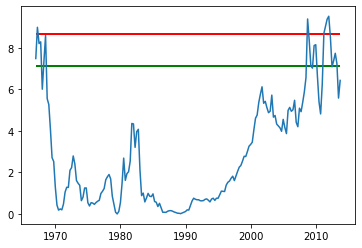

In [84]:
fig, gr = plt.subplots()
gr.plot(graph_data.Time, graph_data.F_stat)
gr.hlines(y=8.68,linewidth=2, xmin=1967.00, xmax=2013.75, color='r')
gr.hlines(y=7.12,linewidth=2, xmin=1967.00, xmax=2013.75, color='green')
plt.show()

In [ ]:
#####